# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  


## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

In [2]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [3]:
#Select three indices of your choice you wish to sample from the dataset
indices = [0,1,2]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844


### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  
*What kind of establishment (customer) could each of the three samples you've chosen represent?*  
**Hint:** Examples of establishments include places like markets, cafes, and retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant.

**Answer:**

1) Customer 0's Establishment should be a cafe as the annual spending on milk is very high and is more than 75% of the total data present and therefore it shows that it is a  cafe.
For fresh items is less than 75% and for Grocery it is less than 75% and for Frozen it is less than 25%. And for items like detergents_paper and delicatessen is less than 50% also. 

2) Customer 1's Establishment should be a retailer as the annual spending is evenly distributed among all the items.
For Fresh it is less than 50% of the data and for milk it is more than 75%, but less than 100%, for Grocery it is nearly equal to 75% of the data and for Frozen also, more than 50% and less than 75%. Same with Detergents_paper and same for delicatessen. Which mean that the spending is more or less equally distributed. 

3) Customer 2's Establishment should be a restaurant as the annual spending on Delicatessen is very high
For Fresh it is nearly equal to 50% of the data and for milk it is more than 75%, but less than 100%, that means it deals with milk more than it does on fresh items, for Grocery it is less than 75% of the data and for Frozen also, more than 50% and less than 75%. But with Detergents_paper it is nearly equal to 75% and no retailer would spend so much on detergents_paper, untill unless it is something that they have to use it daily. And for delicatessen it is way more than  75 %. Which mean that the spending is more on the items that could be only usefull for a Restaurant. 




### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In [4]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
# Copy of the DataFrame,
new_data = data.drop('Delicatessen', axis=1)

# Split the data into training and testing sets using the given feature as the target
X_train, X_test, y_train, y_test = train_test_split(new_data, data['Delicatessen'], test_size=0.25, random_state=0)

# Decision tree regressor
regressor = DecisionTreeRegressor(random_state=1).fit(X_train, y_train)
pred = regressor.predict(X_test)
# The score of the prediction using the testing set
score = r2_score(y_test,pred)
score

-13.42217343758807

### Question 2
*Which feature did you attempt to predict? What was the reported prediction score? Is this feature necessary for identifying customers' spending habits?*  


**Answer:**
Features that I predicted : 

1) Fresh having R2 score : -0.334

2) Milk having R2 score : 0.1733

3) Grocery having R2 score : 0.6257

4) Frozen having R2 score : 0.1469

5) Detergents_Paper having R2 score : 0.7227 

6) Delicatessen having R2 score : -13.42


The highest R2 score are for **Detergents_Paper** and **Grocery**, which shows that these features have high correlation with other features, which implies that these features aren't necessary for identifying customer's spending habits 
No, these feature aren't necessary for identifying customers' spending habits.


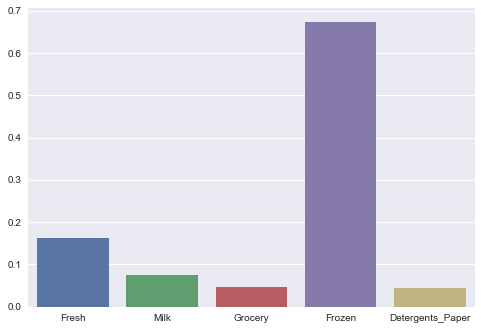

In [23]:
import seaborn as sns
sns.barplot(X_train.columns, regressor.feature_importances_)


### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

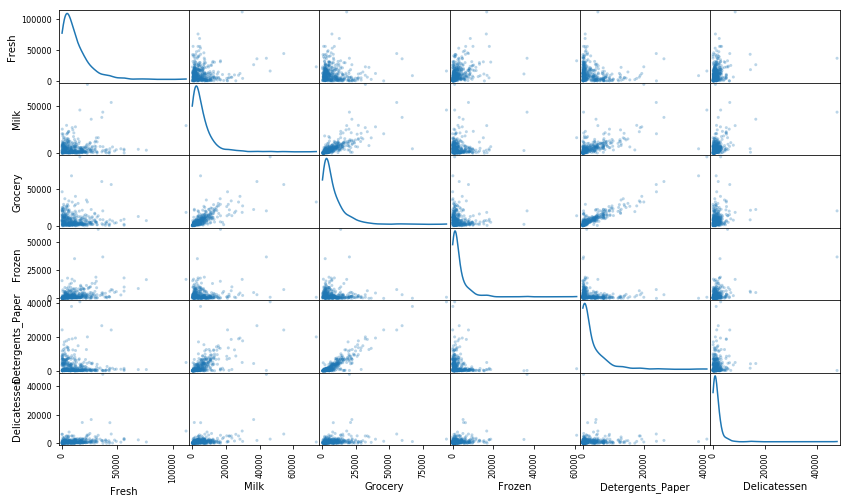

In [6]:
# Produce a scatter matrix for each pair of features in the data
pd.plotting.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Question 3
*Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?*  
**Hint:** Is the data normally distributed? Where do most of the data points lie? 

In [7]:
data.corr()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Fresh,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicatessen,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


**Answer:**

Yes the highest degree of correlation is between detergent paper and grocery. 

This does confirm my suspicions about the relevance of the feature I attempted to predict in Question second. 

No they aren't normally distributed, as the data for grocery is skewed towards right as some data points lie even after the range of 75,000  and same with Detergents_Paper as most of the data lies within the range of 20,000 but some of the data are out of that range and is skewed. 

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.


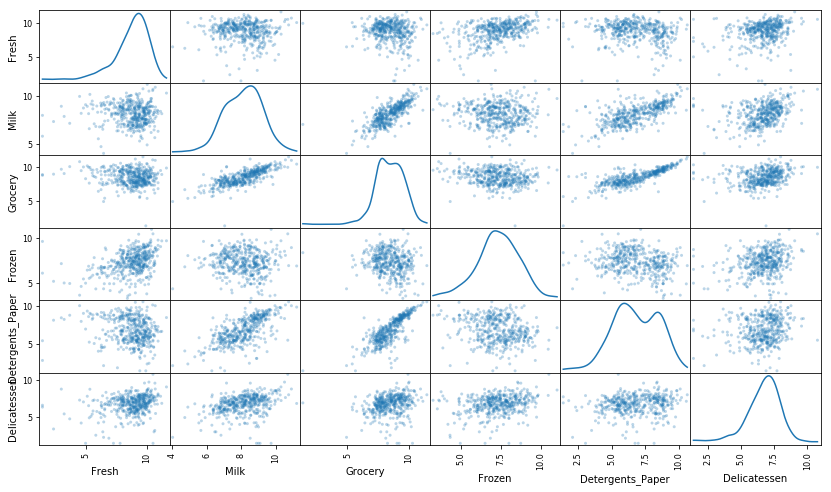

In [8]:
# Scaling the data using the natural logarithm
log_data = np.log(data + 1)

# Scaling the sample data using the natural logarithm
log_samples = np.log(samples + 1)

# Produce a scatter matrix for each pair of newly-transformed features
pd.plotting.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [9]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,9.446992,9.175438,8.930891,5.370638,7.891705,7.199678
1,8.861917,9.191259,9.166284,7.474772,8.099858,7.482682
2,8.756840,9.083529,8.947026,7.785721,8.165364,8.967632


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [10]:
from collections import Counter
# For each feature find the data points with extreme high or low values
lst = list()
for feature in log_data.keys():
    
    # Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(a=log_data[feature], q=25)
    
    # Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(a=log_data[feature], q=75)
    
    # Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = (Q3 - Q1) * 1.5 
    
    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    items = log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))].index
    for number in items:
        lst.append(number)

counter = Counter()
for num in lst:
    counter[num] +=1
print counter.most_common(5)
# OPTIONAL: Select the indices for data points you wish to remove
outliers  = []


# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)


Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.454347,9.950371,10.732672,3.610918,10.095429,7.261225
66,2.302585,7.336286,8.911665,5.170484,8.151622,3.332205
81,5.393628,9.163354,9.575261,5.648974,8.964312,5.056246
95,1.386294,7.979681,8.740817,6.089045,5.411646,6.565265
96,3.178054,7.869784,9.001962,4.983607,8.262301,5.384495
128,4.948760,9.087947,8.249052,4.962845,6.968850,1.386294
171,5.303305,10.160569,9.894295,6.480045,9.079548,8.740497
193,5.198497,8.156510,9.918031,6.866933,8.633909,6.502790
218,2.944439,8.923325,9.629445,7.159292,8.475954,8.759826
304,5.087596,8.917445,10.117550,6.426488,9.374498,7.787797


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.040027,11.205027,10.377078,6.895683,9.907031,6.806829
98,6.222576,4.727388,6.658011,6.797940,4.043051,4.890349
154,6.434547,4.025352,4.927254,4.330733,2.079442,2.197225
356,10.029547,4.905275,5.389072,8.057694,2.302585,6.308098


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923241,7.037028,1.386294,8.391176,1.386294,6.883463
154,6.434547,4.025352,4.927254,4.330733,2.079442,2.197225


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.432071,9.663325,9.723763,3.526361,8.847504,6.073045
57,8.597482,9.203718,9.257987,3.663562,8.932345,7.156956
65,4.454347,9.950371,10.732672,3.610918,10.095429,7.261225
145,10.000614,9.034200,10.457171,3.761200,9.440817,8.396381
175,7.759614,8.967759,9.382191,3.970292,8.342125,7.437206
264,6.979145,9.177817,9.645105,4.127134,8.696343,7.143618
325,10.395681,9.728241,9.519808,11.016496,7.149132,8.632306
420,8.402231,8.569216,9.490091,3.258097,8.827468,7.239933
429,9.060447,7.467942,8.183397,3.871201,4.442651,7.824846
439,7.933080,7.437795,7.828436,4.189655,6.169611,3.970292


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923241,7.037028,1.386294,8.391176,1.386294,6.883463
161,9.428270,6.293419,5.648974,6.996681,1.386294,7.711549


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.302585,7.336286,8.911665,5.170484,8.151622,3.332205
109,7.249215,9.724959,10.274603,6.513230,6.729824,1.386294
128,4.948760,9.087947,8.249052,4.962845,6.968850,1.386294
137,8.035279,8.997271,9.021961,6.495266,6.582025,3.610918
142,10.519673,8.875287,9.018453,8.005033,3.044522,1.386294
154,6.434547,4.025352,4.927254,4.330733,2.079442,2.197225
183,10.514557,10.690831,9.912001,10.506026,5.480639,10.777789
184,5.793014,6.823286,8.457655,4.317488,5.814131,2.484907
187,7.799343,8.987572,9.192176,8.743532,8.149024,1.386294
203,6.369901,6.530878,7.703910,6.152733,6.861711,2.944439


[(154, 3), (128, 2), (65, 2), (66, 2), (75, 2)]


### Question 4
*Are there any data points considered outliers for more than one feature based on the definition above? Should these data points be removed from the dataset? If any data points were added to the `outliers` list to be removed, explain why.* 

**Answer:**

1) Yes, the rows with the index 154, 128, 65, 66 and 75 are outliers as I have found using Counter function of python, for all the data points that are occuring more than once.

The data point shouldn't be removed as it might have a particular meaning as it was mentioned in the article for which the link was attached above. 
Every data point has some information and that information can be a requirement to learn everything about that data set. 
Sometimes it is important to remove the outliers as it might disturb the range and the pattern we want the machine to know while training it. But, it could be a hint for some of the data in the test data set, which could actually explain a different category of the customer segment. So, we shouldn't remove the outliers at all in this case. 



**Heat Map **

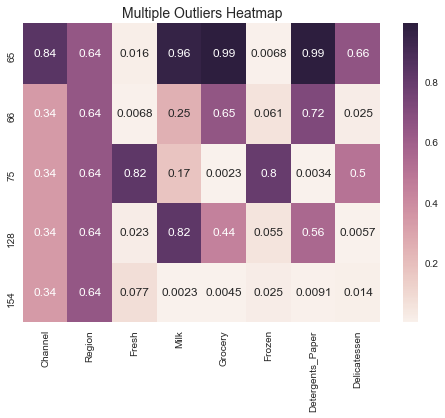

In [24]:
# Heatmap using percentiles to display outlier data
import matplotlib.pyplot as plt
import seaborn as sns
percentiles = data.rank(pct=True)
percentiles = percentiles.iloc[[65, 66, 75, 128, 154]]
plt.title('Multiple Outliers Heatmap', fontsize=14)
heat = sns.heatmap(percentiles, annot=True)
display(heat)


## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.


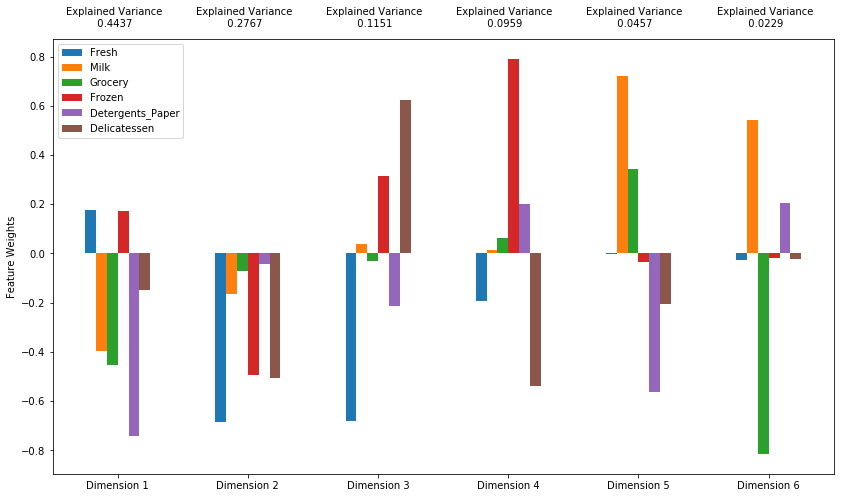

In [12]:
from sklearn.decomposition import PCA
# Applying PCA by fitting the good data with the same number of dimensions as features
pca = PCA(n_components=6).fit(good_data)

# Transforming log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

### Question 5
*How much variance in the data is explained* ***in total*** *by the first and second principal component? What about the first four principal components? Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.*  


**Answer:**

The variance explained in total by the first and second principal component is 0.7204. In the first principal component, it will increase with the decrease in majorly detergents_paper and then followed by milk and grocery. In the second principal component it will increase with only the decrease of all the components, but majorly in Fresh, then followed by Delicatessen and Frozen. 
The variance explained in total by the first four principal components is 0.9314. 



** 2nd Part ** 

In the first dimension, the customer spending is the maximum, as the explained variance is maximum in dimension 1. But also, this dimension shows the maximum magnitude of Detergents_Paper, so it is maily for places like Restaurants and Cafes.

After that, in dimension 2, the  explained variance decreases, indicating that the customer spending becomes less in the second dimension which can be seen, as there is no possitive weight and it shows that none of the item has a maximum spending than  the PCA as defined the average spending and here the maximum weights are given to Fresh then followed by Delicatessen and then Frozen, it clearly shows that this dimension represents a take away food shop which sells Fresh, Frozen Food and Delicatessen

And it keeps on decreasing after that, eg. in the third principal component the explained variance is 0.1151 but here there is really high weights for Fresh and after that delicatessen items and this shows that it is clearly indicating a shop like a restaurant as others have really low weights.

And for the fourth dimension which has the least variance, the frozen item in this component is the highest weighted feature and after that comes Delicatessen which indicates that this dimension might refer to a shop in a market that sells food which can be kept for a long time and isn't fresh as it is clear that it doesn't deal with Fresh Items much as it's spending is way lower and in comparison to Dimension 2, it has a similar pattern, but they have the highest spending in Fresh items, where this one has the higheset Spending in Frozen items.

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [13]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,-1.7469,-0.0627,-0.9756,-1.6869,0.2676,0.3980
1,-1.7936,-0.8697,0.2127,-0.0043,0.1133,0.2301
2,-1.8842,-1.6694,1.2977,-0.5414,-0.3905,0.3283


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.


In [14]:
# Applying PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2).fit(good_data)

# Transforming the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# Transforming log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [15]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,-1.7469,-0.0627
1,-1.7936,-0.8697
2,-1.8842,-1.6694


## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

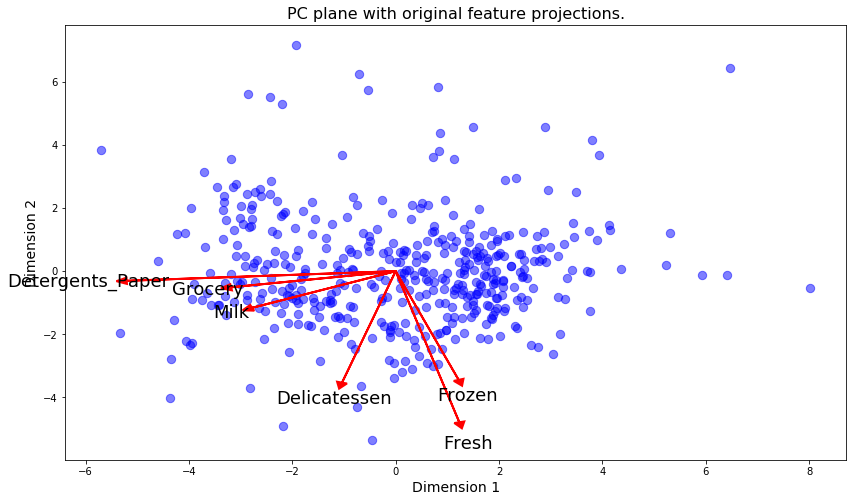

In [16]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6
*What are the advantages to using a K-Means clustering algorithm? What are the advantages to using a Gaussian Mixture Model clustering algorithm? Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?*

**Answer:**
Advantages of using a K-Means clustering is that , it helps to divide the points into seperate (hard) clusters in order to make it clear which point depends on which point. It also gives the cluster center, in order for us to calculate the silhouette score. 

Gaussian Mixture model on the other hand gives the soft cluster,i.e., it gives the cluster, which can share the same point together. In K-Means there are no sharing of points by any cluster, but in Gaussian Mixture Model it gives the cluster sharing a single point which can actually belong to any of those two. 

I'll prefer using the KMeans Algorithm, reason being that according to the trend of data and my understanding, no two customers in this case can share the same cluster. For eg. A person who has a shop of Dairy, will only sell one particular item in abundance and will be in a different cluster from the person who sells only grocery and from a person who sells both of these, as the quanitity of the item he/she will purchase will always be lower for that particular item in which the other person has a whole business in.

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In [17]:
# Applying clustering algorithm to the reduced data
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
clusterer = KMeans(n_clusters=2,random_state=0).fit(reduced_data)

# Predicting the cluster for each data point
preds = clusterer.predict(reduced_data)

# Finding the cluster centers
centers = clusterer.cluster_centers_

# Predicting the cluster for each transformed sample data point
sample_preds = clusterer.predict(pca_samples)

# Man silhouette coefficient for the number of clusters chosen
score = silhouette_score(reduced_data, preds, random_state=1)
print score

0.420459967421


### Question 7
*Report the silhouette score for several cluster numbers you tried. Of these, which number of clusters has the best silhouette score?* 

**Answer:**

1) For n_clusters = 2 , the silhouette score is 0.4204

2) For n_clusters = 4 , the silhouette score is 0.3300

3) For n_clusters = 6 , the silhouette score is 0.3616

4) For n_clusters = 8 , the silhouette score is 0.3487

**The best silhouette score is for Number of clusters = 2**

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

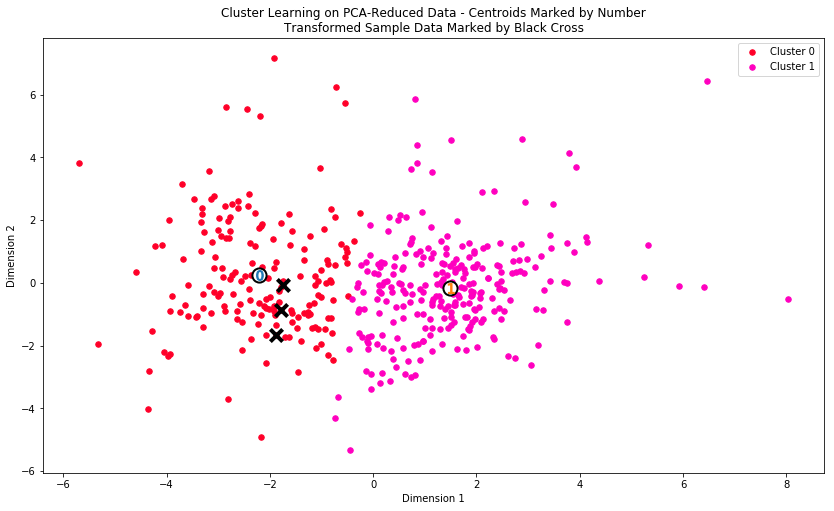

In [18]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In [19]:
# Inverse transform of the centers
log_centers = pca.inverse_transform(centers)

# Exponentiate the centers
true_centers = np.exp(log_centers)

# Displaying the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,3567.0,7804.0,12513.0,897.0,4592.0,973.0
Segment 1,9003.0,1912.0,2379.0,2084.0,295.0,686.0


### Question 8
Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project. *What set of establishments could each of the customer segments represent?*  


**Answer:**

Cluster 0 should best identify with the establishments represented by the feature set of Segment 1
It is so, because in segment 1 we can see that, the moeny spent on Fresh is really high than segment 0, which I saw in the graph we'd plot for Dimension 1 vs Dimension 2(PC plane with original feature projections), and compared it to the second plot of dimension 1 vs Dimension 2 plot (Cluster Learning on PCA Reduced data) but where we have plotted the clusters and the centroids. And it is clearly visible by comparing these two plots, that the area where Fresh is more lies in the cluster 0 area. and the area where Frozen should be more is also Cluster 0 and detergent paper, grocery and milk should be low, also lies in the cluster 0.
Also, comparing the segment data with the insight of the complete dataset, we can observe that for Segment 1, the spending on 

1) Fresh > 50% of the data range

2) Milk < 50%

3) Grocery < 25%

4) Frozen > 50%

5) Detergents_Paper is nearly equal ~= to 25%

6) Delicatessen is < 50%, nearly equal to 40-42%


So, to lie in Cluster 0, the items that should be lower are : Detergent_Paper, Milk and Grocery and also a little less from 50% in Delicatessen which is clearly visible through data, whiich proves that our observation is right. 


Cluster 1 should best identify with the establishments represented by the feature set of Segment 0
It is so for the same reason, why I felt that cluster 0 represents segment 1. Like in Cluster 1 area, there is an increase in the milk, grocery and detergents paper which is also the case in segment 0.

Also, comparing the segment data with the insight of the complete dataset, we can observe that for Segment 0, the spending on 

1) Fresh is nearly equal to ~= 25% of the data range

2) Milk > 75% 

3) Grocery > 75% 

4) Frozen ~= 25%

5) Detergents_Paper > 75%

6) Delicatessen > 50%

So, to lie in Cluster 1, the items that should be higher are : Detergent_Paper, Milk and Grocery and also a little more from 50% in Delicatessen and lower in Fresh and Frozen which is clearly visible through data, which proves that our observation is right. 



### Question 9
*For each sample point, which customer segment from* ***Question 8*** *best represents it? Are the predictions for each sample point consistent with this?*


**Answer:**

For each sample point, the customer segment that best represents it is Segment 1, as we can observe in the image that they lie near the center of cluster 0 and thus the segment 1 will best represent them.

In [20]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred
    print 'The distance between sample point {} and center of cluster {}:'.format(i, pred)
    print (samples.iloc[i] - true_centers.iloc[pred])


Sample point 0 predicted to be in Cluster 0
The distance between sample point 0 and center of cluster 0:
Fresh               9102.0
Milk                1852.0
Grocery            -4952.0
Frozen              -683.0
Detergents_Paper   -1918.0
Delicatessen         365.0
dtype: float64
Sample point 1 predicted to be in Cluster 0
The distance between sample point 1 and center of cluster 0:
Fresh               3490.0
Milk                2006.0
Grocery            -2945.0
Frozen               865.0
Detergents_Paper   -1299.0
Delicatessen         803.0
dtype: float64
Sample point 2 predicted to be in Cluster 0
The distance between sample point 2 and center of cluster 0:
Fresh               2786.0
Milk                1004.0
Grocery            -4829.0
Frozen              1508.0
Detergents_Paper   -1076.0
Delicatessen        6871.0
dtype: float64


For Sample 0, the values for 'Grocery', 'Milk', and 'Detergents_Paper' are above average and resemble the Cluster 0 center in those categories. 'Delicatessen' is near average for both sample and the predicted cluster, but the Fresh is close to the average of cluster 0 and so the predicted cluster seems to be consistent with the category spending of the sample.

For Sample 1, the values for 'Frozen', and 'Fresh' are near average and resemble the Cluster 0 center in those categories. 'Delicatessen' is near average for both sample and the predicted cluster, and so the predicted cluster seems to be consistent with the category spending of the sample.

For Sample 2, the values for 'Fresh', 'Grocery', and 'Frozen' are near average and resemble the Cluster 0 center in those categories. 'Delicatessen' is near average for both sample and the predicted cluster, and so the predicted cluster seems to be consistent with the category spending of the sample.

And the predictions for each sample point is consistent with this. 

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. *How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*  
**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:**

The changes will not affect equally to all the customers. But the customers belonging to the cluster 1 will be affected negatively and they'll react negatively as the customers lying under cluster 1 are those needs milk, delicattesen, grocery and detergents more, which are the things that are needed in very high quantities for the customers belonging to cluster 1.
If we run an A/B test on the population lying under cluster 1, the experimental group will be delivered 3 days a week, while the control group will be delivered 5 days a week. We'll have to run A/B test 4 Times, in order to judge it for every item that this group spends the most on. And since the items consists of 
1) Milk -> If milk is delivered to a place where there items are made using milk, the experimental population would not be able to make those items and this would definately affect their customer service a lot as they wont be able to deliver the items they have mentioned in their menu as these are items are something that wont last longer than a day and they wont be able to take it in abundance, hence it would affect negatively. 

2) Delicatessen -> Delicatessen items are the necessity for a place like a bakery. And if the wholesale distributor will plan to deliver it only 3 days a week, the customer that will be coming on those other two days would find another place in order to get their items that they want as these are items are something that wont last longer than a day and hence it would affect the sale negatively.

3) Grocery-> For a retailer shop, if a person doesn't have enough items to sell and those items which their customers need on a daily basis, the customers would just go and find another grocery store and thus it would affect them negatively.

4) Detergents -> For this, I can say, that the group that uses Detergents_Paper are mostly that are in Hotel/Cafes where there is a high need of this item. And this is one item in this cluster that can be taken in abundance and therefore it wont affect the population is a negative manner if the delivery boy is ready to increase the quantity while decreasing the number of days of delivery. 

There are 3 factors where we can see that the people in the experimental group would react negatively, whereas the control group would be happy with their sales/services and hence, A/B test will fail and the changes wont be applied. 


And for the cluster 0 customers, the quantity of fresh and frozen is only high, which are less items that cluster 1 and therefore it wouldn't react as negatively as cluster 1 customers. 
If we run an A/B test on this population that is lying under cluster 0, the experimental group will be delivered 3 days a week, while the control group will be delivered 5 days a week. We'll have to run A/B test 2 Times, in order to judge it for every item that this group spends the most on. And since the items consists of 

1) Fresh -> This is something which can also be kept, while some prefer to take fresh without any preservatives, so it might affect the experimental population in a neutral way.

2) Frozen -> This is something which can be kept and can be taken in abundance and so the experiment would result in a positive result for this item.

There are only 2 factors, out of which we can see that 1 will give a neutral result, while the other would give a positive result and hence the changing of delivery service from 5 days to 3 days would give a positive result from this cluster. 


### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
*How can the wholesale distributor label the new customers using only their estimated product spending and the* ***customer segment*** *data?*  

**Answer:**

For this, we can label the customers with their respective segments depending upon their clusters and then train the model using a supervised classification model, where we'll be classifying the customers depending on the segment they were in and then after that we can predict the new customer's label using only their estimated product spending and the customer segment data. 


### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.


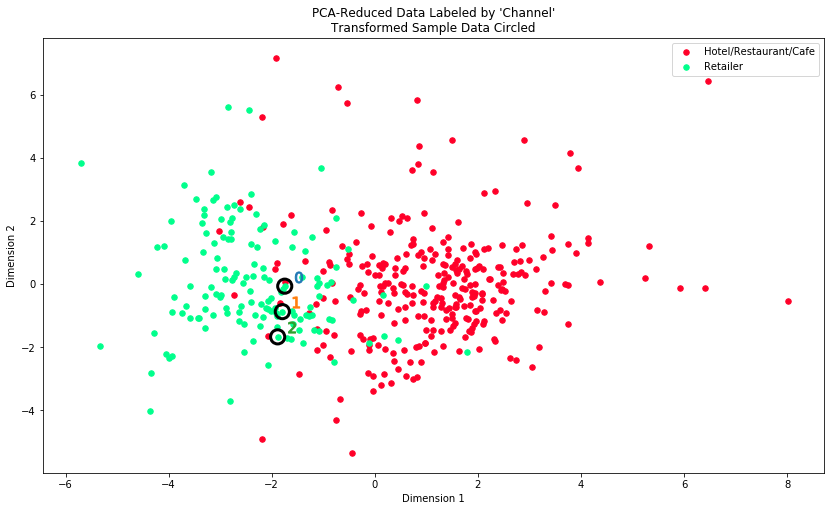

In [21]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)

### Question 12
*How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? Would you consider these classifications as consistent with your previous definition of the customer segments?*

In [22]:
#find percentage of correctly classified customers
data = pd.read_csv("customers.csv")
data = data.drop(data.index[outliers]).reset_index(drop = True)
# might need to switch around the 0 and 1, based on your cluster seed
df = np.where(data['Channel'] == 2, 0, 1)
print "Percentage of correctly classified customers: {:.2%}".format(sum(df == preds)/float(len(preds)))


Percentage of correctly classified customers: 88.86%


**Answer:**
The clustering algorithm does a really fine job and also the number of clusters does.
Yes, there are customer segments that would be classified as purely Retailers or Hotels/Restaurants/Cafes. Customer Segment 0 can be classified as purely Hotels/Restaurants/Cafes as the amount they spend on delicattesen, milk, detergents and grocery was really high, which normally Hotels/Restaurants/Cafes would spend on too. And the Retailers would spend more on Fresh and Frozen and not on detergents, which is a clear factor to distinguish between the two segments. 

These classification are consistent with the previous definition of the customer segments with a little bit of error, but it's accuracy according to me is really high, so I'll say they were consistent. 